In [19]:
%matplotlib inline

In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload 2

In [22]:
!python -V

Python 3.8.6


In [23]:
!pwd

/home/deepstation/Projects/rock-paper-scissor


In [24]:
import matplotlib.pyplot as plt

from morty.config import ConfigManager
from morty.experiment import set_random_seed
from rock_paper_scissors.datasets import get_dataset, get_test_dataset

# Dataset Augmentation

This notebook shows augmented images and helps to select useful aumentation technics in order to avoid overfitting and get a robust model.

In [25]:
config = ConfigManager(config_path='configs', config_name='basic_config', console_args={})

print(config)

ConfigManager({
  "seed": 63815329,
  "train_dataset_path": "data/rps/rps/",
  "test_dataset_path": "data/rps-test-set/rps-test-set/",
  "image_size": [
    300,
    300
  ],
  "num_classes": 3,
  "epochs": 30,
  "batch_size": 32,
  "learning_rate": 0.001,
  "feature_extractor": "MobileNetV2",
  "train_augmentation": "Compose([\n  VerticalFlip(always_apply=False, p=0.5),\n  HorizontalFlip(always_apply=False, p=0.5),\n  RandomBrightness(always_apply=False, p=0.5, limit=(-0.2, 0.2)),\n  CoarseDropout(always_apply=False, p=0.5, max_holes=20, max_height=8, max_width=8, min_holes=10, min_height=8, min_width=8, fill_value=0, mask_fill_value=None),\n  GaussNoise(always_apply=False, p=1.0, var_limit=(10.0, 50.0)),\n], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})",
  "validation_augmentation": "Compose([\n  VerticalFlip(always_apply=False, p=0.5),\n  HorizontalFlip(always_apply=False, p=0.5),\n], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})",
  

In [26]:
set_random_seed(config.seed)

train_dataset = get_dataset(
    config.train_dataset_path,
    'training',
    config.train_augmentation,
    validation_fraction=0.2,
    batch_size=config.batch_size,
    image_size=config.image_size,
    seed=config.seed,
)

Found 2520 files belonging to 3 classes.
Using 2016 files for training.


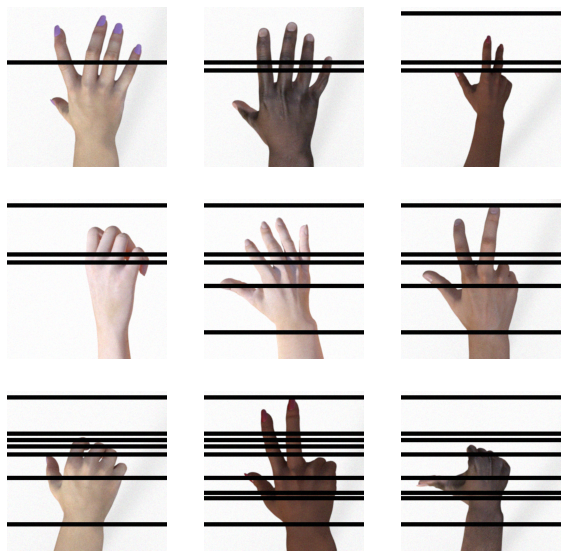

In [27]:
plt.figure(figsize=(10, 10))

for image_batch, _ in train_dataset.take(1):
    for idx in range(9):
        image = image_batch[idx].numpy().astype('uint8')

        ax = plt.subplot(3, 3, idx + 1)
        plt.imshow(image)
        plt.axis('off')

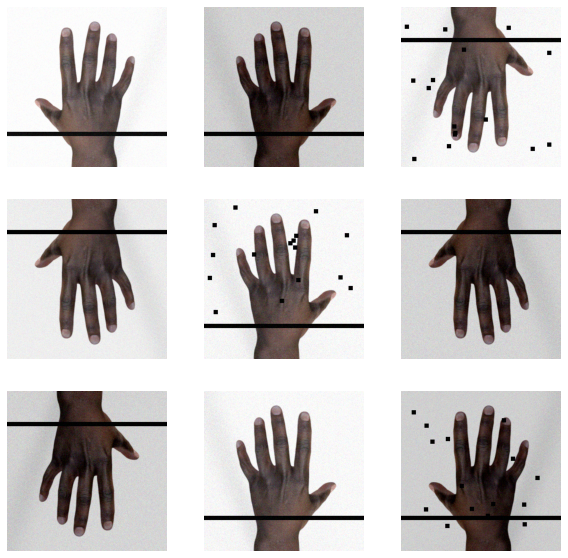

In [42]:
plt.figure(figsize=(10, 10))

for image_batch, _ in train_dataset.take(1):
    image = image_batch[0].numpy().astype('uint8')

    for idx in range(9):
        augmented_image = config.train_augmentation(image=image)['image']

        ax = plt.subplot(3, 3, idx + 1)
        plt.imshow(augmented_image)
        plt.axis('off')